In [2]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"

datapath="./" #this is teh path where the data of our tracked clusters is

plot_path="./plots/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

data_start=596
data_end=690



fn_clusters_initial="m12i_"+simtype+"_clusters_at_snapshot_"+str(data_start)+".pkl" 
fn_clusters_later="m12i_"+simtype+"_clusters_at_snapshot_"+str(data_end)+".pkl" 

with open(datapath+fn_clusters_initial, "rb") as input:
    initial_data= pickle.load(input)

with open(datapath+fn_clusters_later, "rb") as input:
    later_data= pickle.load(input)

#print("########################## TEST: This is cluster data from second cluster",cluster_data[1])
print("####################### Total clusters present is",len(initial_data))
print("\n############## Keys to access the data: \n",initial_data[1].keys())


#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

####################### Total clusters present is 17

############## Keys to access the data: 
 dict_keys(['ind_tracked', 'age_tracked', 'x_tracked', 'y_tracked', 'z_tracked', 'vx_tracked', 'vy_tracked', 'vz_tracked', 'mass_tracked', 'xcm', 'ycm', 'zcm', 'delta_rxyz', 'rmax', 'ymax', 'ymin', 'xmax', 'xmin', 'avg_delta_rxyz', 'vR_cyl_tracked', 'vphi_cyl_tracked', 'vz_cyl_tracked'])


In [10]:
later_data[2]["xmin"]

-11.185672977154582

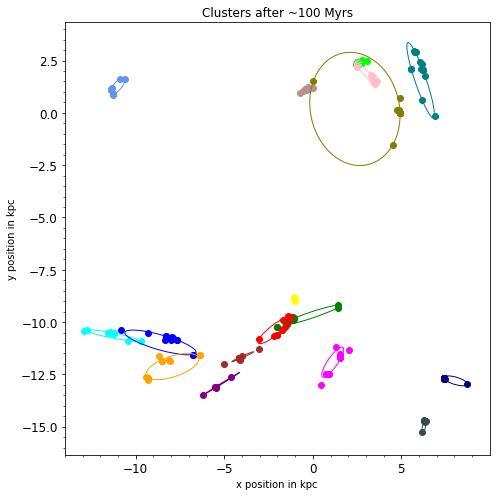

In [3]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
total_clusters=len(later_data)
fig11 = plt.figure(figsize=(7,7))
#fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
cluster_count=0
#plot_count=0
ax = fig11.add_subplot(1,1,1)

for i in range(total_clusters):

    x=later_data[cluster_count+1]["x_tracked"]
    y=later_data[cluster_count+1]["y_tracked"]
    xcm=later_data[cluster_count+1]["xcm"]
    ycm=later_data[cluster_count+1]["ycm"]
    z=later_data[cluster_count+1]["z_tracked"]
    
    s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count])
    #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    ax.minorticks_on()
    ax.set_xlabel("x position in kpc")
    ax.set_ylabel("y position in kpc")
    ax.set_title("Clusters after ~100 Myrs")
    
    xy=zip(x,y)
    xy_array=np.array(tuple(xy))
    
    ####
    '''
    xc=xcm
    yc=ycm
    theta=3.1415
    a=1.1
    b=2.1
    ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
    ax.add_patch(ell_patch)
    '''
    ####
    
    ell = EllipseModel()
    e=ell.estimate(xy_array)
    if(e==True):
        xc, yc, a, b, theta = ell.params
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
    
    cluster_count+=1 
    
    
#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
    
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")
fig11.savefig("ellipse.png")
plt.tight_layout()
plt.show()

# Running A test

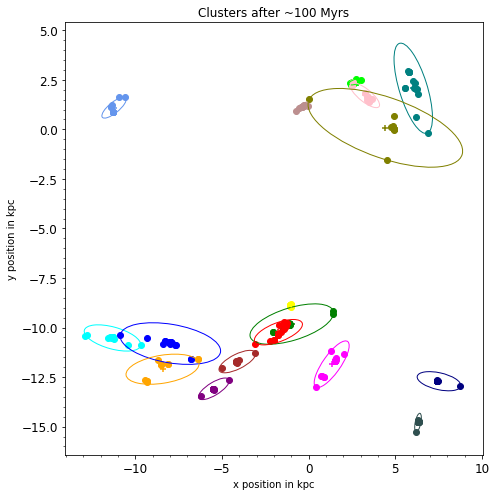

In [79]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
total_clusters=len(later_data)
fig11 = plt.figure(figsize=(7,7))
#fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
cluster_count=0
#plot_count=0
ax = fig11.add_subplot(1,1,1)

for i in range(total_clusters):

    x=later_data[cluster_count+1]["x_tracked"]
    y=later_data[cluster_count+1]["y_tracked"]
    z=later_data[cluster_count+1]["z_tracked"]
    
    xcm=later_data[cluster_count+1]["xcm"]
    ycm=later_data[cluster_count+1]["ycm"]
    rmax=later_data[cluster_count+1]["rmax"]
    
    dists=((xcm-x)**2+(ycm-y)**2)**(1/2) #dists is an array that stores distance from cm to each point serially
    dists_max=np.max(dists) #finding the maximum value of distance in the dist array
    dists_min=np.min(dists) #finding the minimum value of distance in the dist array
    
    max_location=np.where(dists==dists_max) #finding the location in the dists array where the max distance is at to find the point
    min_location=np.where(dists==dists_min) #finding the location of min distance to find the point where the min distance is

    max_point_x=x[max_location] #extracting is the x and y position of the max point Note: it is still an array
    max_point_y=y[max_location]
    
    min_point_x=x[min_location] #extracting is the x and y position of the min point Note: it is still an array
    min_point_y=y[min_location]
    
    angle=(max_point_y[0]-min_point_y[0])/(max_point_x[0]-min_point_x[0]) #slope of the line joining max and min points

    slope=np.arctan(angle)
    ax.scatter(xcm,ycm,marker="+",c=colors[cluster_count])
    s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count])
    #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    ax.minorticks_on()
    ax.set_xlabel("x position in kpc")
    ax.set_ylabel("y position in kpc")
    ax.set_title("Clusters after ~100 Myrs")
    
    xy=zip(x,y)
    xy_array=np.array(tuple(xy))
    
    ####
    
    xc=xcm
    yc=ycm
    theta=slope
    a=rmax
    b=rmax/3
    ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
    ax.add_patch(ell_patch)
    
    ####
    '''
    ell = EllipseModel()
    e=ell.estimate(xy_array)
    if(e==True):
        xc, yc, a, b, theta = ell.params
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
    '''
    cluster_count+=1 
    
    
#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
    
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")
fig11.savefig("mymodel_ellipse.png")
plt.tight_layout()
plt.show()

These are the x [4.73836576 4.94196952 4.93943789 4.84773495 0.03621673 4.9405648
 4.94680665 4.93567873 4.54481462 4.94430598 4.94026596]
These are the y [ 0.13472754 -0.00245979 -0.00585729  0.15464399  1.54050562 -0.00527888
 -0.00290999  0.68842241 -1.55186857 -0.01585478 -0.00301221]
These are the distances [0.31625327 0.52004161 0.51805935 0.42741763 4.62955043 0.51908238
 0.5248918  0.79624064 1.6312915  0.5245112  0.51844029]
4.629550429164903
max_point_x [0.03621673]
xmin ymin [4.73836576] [0.13472754]
xmax ymax [0.03621673] [1.54050562]
This is the angle -0.29896501843468415


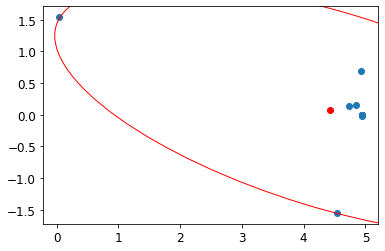

In [70]:
x=later_data[16]["x_tracked"]
y=later_data[16]["y_tracked"]
xcm=later_data[16]["xcm"]
ycm=later_data[16]["ycm"]
rmax=later_data[16]["rmax"]
dists=((xcm-x)**2+(ycm-y)**2)**(1/2)
print("These are the x",x)
print("These are the y",y)
print("These are the distances",dists)
dists_max=np.max(dists)
print(dists_max)
dists_min=np.min(dists)
max_location=np.where(dists==dists_max)
min_location=np.where(dists==dists_min)

max_point_x=x[max_location]
max_point_y=y[max_location]

print("max_point_x",max_point_x)

min_point_x=x[min_location]
min_point_y=y[min_location]

print("xmin ymin",min_point_x,min_point_y)

print("xmax ymax",max_point_x,max_point_y)


xc=xcm
yc=ycm
angle=(max_point_y[0]-min_point_y[0])/(max_point_x[0]-min_point_x[0])

theta=np.arctan(angle)
print("This is the angle",angle)
#theta=3.1415
a=rmax
b=rmax/3

fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.scatter(x,y)
ax1.scatter(xcm,ycm,c="red")
ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor="red", facecolor='none')
ax1.add_patch(ell_patch)